In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time, datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.tail()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [4]:
df.columns = df.columns.str.replace("*","")

In [5]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [7]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [8]:
df.shape

(1156, 7)

In [9]:
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

# Handle Missing Values

## 1) delete rows which is unnecessary(unrelatable,redundant data, unclear business logic, no statistical logic)
## 2) Add Business Logics if given
## 3) Impute MEAN/MEDIAN/MODE features for numeric data and count of higher values for categorical data

In [10]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

<Axes: >

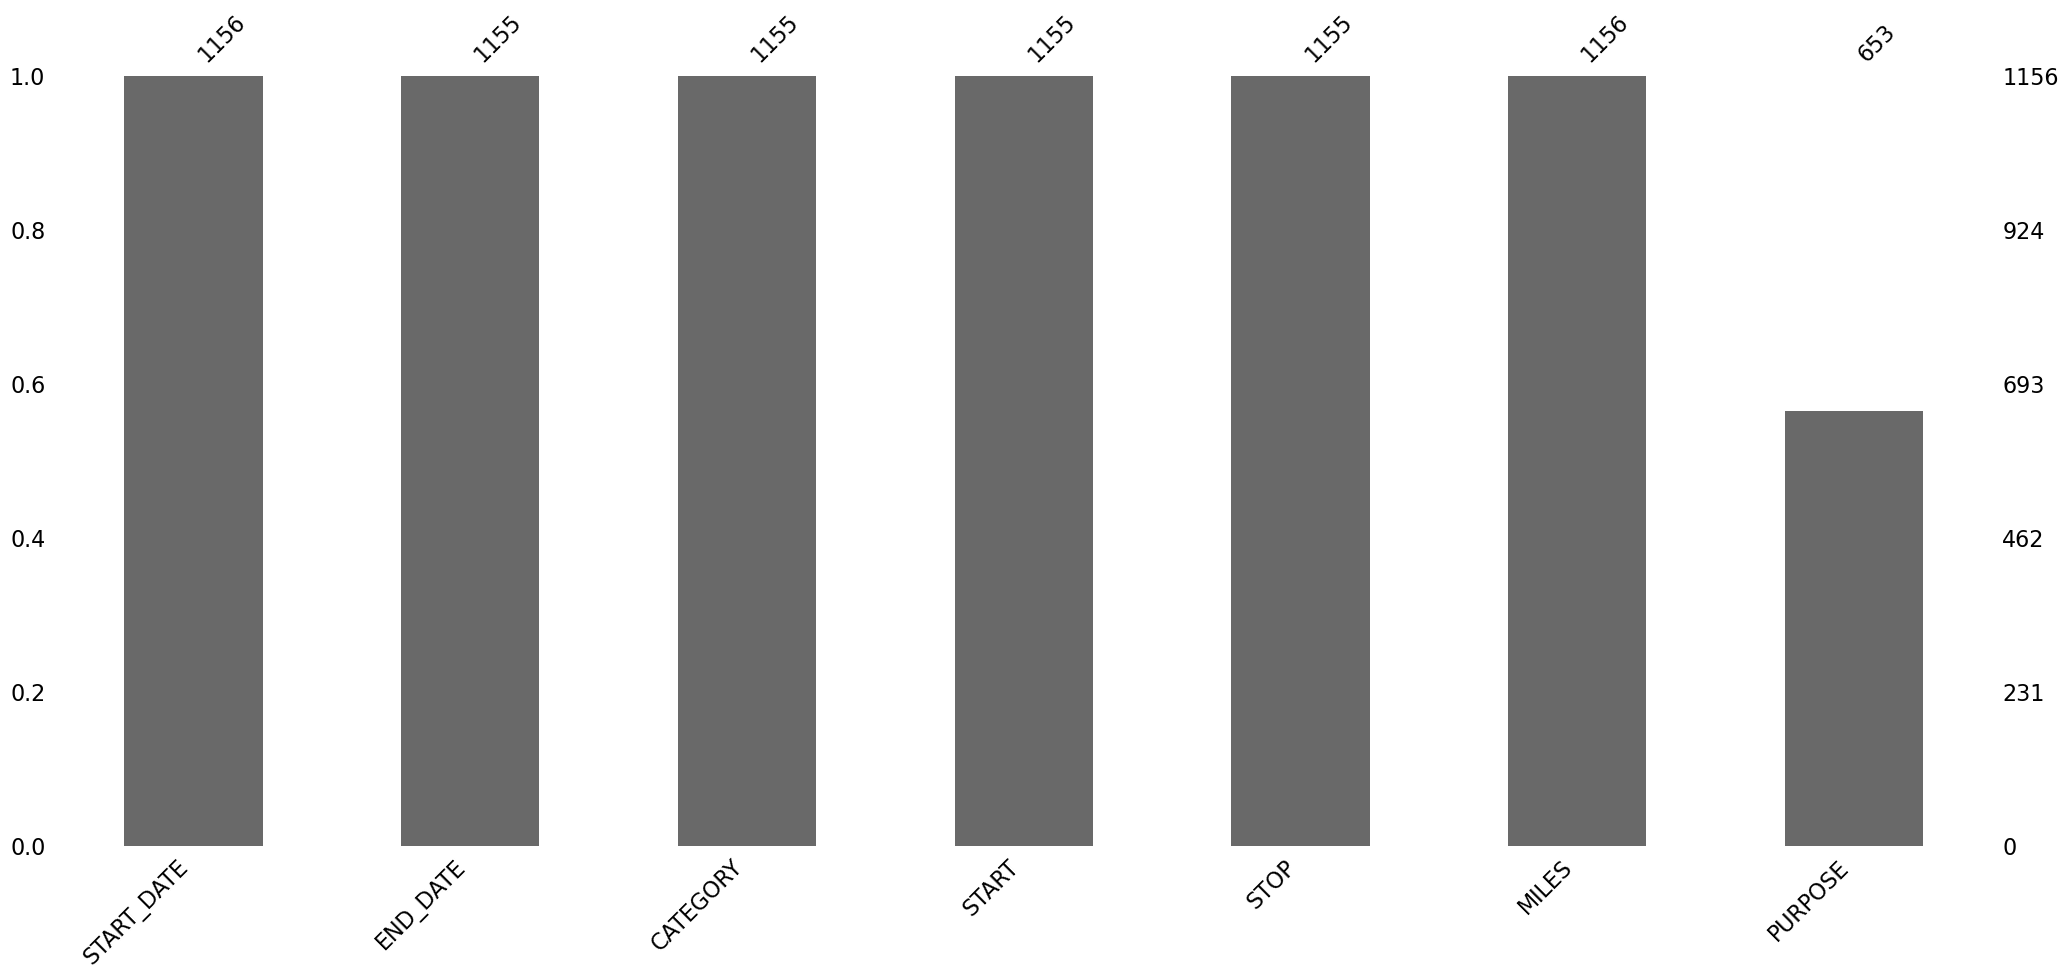

In [11]:
import missingno as msno
msno.bar(df)

In [12]:
null_column = df.columns[df.isnull().any()]

In [13]:
null_column

Index(['END_DATE', 'CATEGORY', 'START', 'STOP', 'PURPOSE'], dtype='object')

In [14]:
df[null_column].isnull().sum()

END_DATE      1
CATEGORY      1
START         1
STOP          1
PURPOSE     503
dtype: int64

In [15]:
df.drop(index = 1155, axis = 0, inplace = True)

In [16]:
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [17]:
df["PURPOSE"].isnull().sum()/len(df)

0.43463203463203465

In [18]:
df["PURPOSE"].fillna(method = 'ffill', inplace = True)

In [19]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [20]:
df.tail(20)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1135,12/29/2016 12:25,12/29/2016 12:33,Business,Kar?chi,Kar?chi,1.4,Errand/Supplies
1136,12/29/2016 13:17,12/29/2016 13:24,Business,Kar?chi,Kar?chi,1.1,Errand/Supplies
1137,12/29/2016 13:56,12/29/2016 14:11,Business,Kar?chi,Kar?chi,4.1,Airport/Travel
1138,12/29/2016 14:42,12/29/2016 14:58,Business,Kar?chi,Kar?chi,6.1,Between Offices
1139,12/29/2016 15:05,12/29/2016 15:16,Business,Kar?chi,Kar?chi,1.3,Errand/Supplies
1140,12/29/2016 18:59,12/29/2016 19:14,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain
1141,12/29/2016 19:50,12/29/2016 20:10,Business,Unknown Location,Kar?chi,4.1,Customer Visit
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Kar?chi,Kar?chi,7.2,Meeting
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,Meeting
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting


In [21]:
df["PURPOSE"].value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [22]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1155 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1155 non-null   float64
 6   PURPOSE     1155 non-null   object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [24]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors= 'coerce')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   object        
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 63.3+ KB


In [26]:
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors= 'coerce')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [28]:
df.tail(20)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
1135,2016-12-29 12:25:00,2016-12-29 12:33:00,Business,Kar?chi,Kar?chi,1.4,Errand/Supplies
1136,2016-12-29 13:17:00,2016-12-29 13:24:00,Business,Kar?chi,Kar?chi,1.1,Errand/Supplies
1137,2016-12-29 13:56:00,2016-12-29 14:11:00,Business,Kar?chi,Kar?chi,4.1,Airport/Travel
1138,2016-12-29 14:42:00,2016-12-29 14:58:00,Business,Kar?chi,Kar?chi,6.1,Between Offices
1139,2016-12-29 15:05:00,2016-12-29 15:16:00,Business,Kar?chi,Kar?chi,1.3,Errand/Supplies
1140,2016-12-29 18:59:00,2016-12-29 19:14:00,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain
1141,2016-12-29 19:50:00,2016-12-29 20:10:00,Business,Unknown Location,Kar?chi,4.1,Customer Visit
1142,2016-12-29 20:15:00,2016-12-29 20:45:00,Business,Kar?chi,Kar?chi,7.2,Meeting
1143,2016-12-29 20:53:00,2016-12-29 21:42:00,Business,Kar?chi,Unknown Location,6.4,Meeting
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting


In [29]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

## Places with highest starting Point

In [30]:
df.CATEGORY.value_counts()

Business    1078
Personal      77
Name: CATEGORY, dtype: int64

In [31]:
category = pd.crosstab(index = df['CATEGORY'], columns = 'count of travellers as per category')

In [32]:
category

col_0,count of travellers as per category
CATEGORY,
Business,1078
Personal,77


<Axes: xlabel='CATEGORY'>

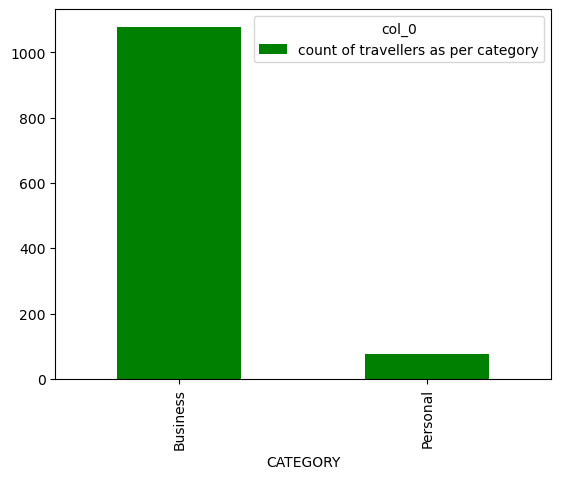

In [33]:
category.plot(kind = 'bar',color = 'g')

In [34]:
sp = df.START.value_counts()

In [35]:
sp

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
                   ... 
Florence              1
Ridgeland             1
Daytona Beach         1
Sky Lake              1
Gampaha               1
Name: START, Length: 177, dtype: int64

In [36]:
print(sp[sp>10])

Cary                201
Unknown Location    148
Morrisville          85
Whitebridge          68
Islamabad            57
Durham               37
Lahore               36
Raleigh              28
Kar?chi              27
Westpark Place       17
Apex                 17
Berkeley             16
Midtown              14
Kenner               11
Kissimmee            11
R?walpindi           11
Name: START, dtype: int64


<Axes: ylabel='START'>

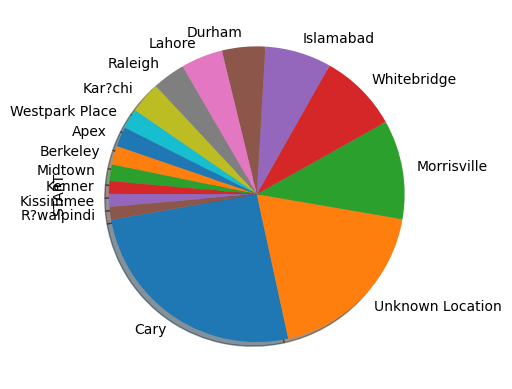

In [37]:
sp[sp>10].plot(kind = 'pie',shadow = True, startangle = 190)

##   Cary has most number of starting points

# Places with lowest starting point

<Axes: ylabel='Frequency'>

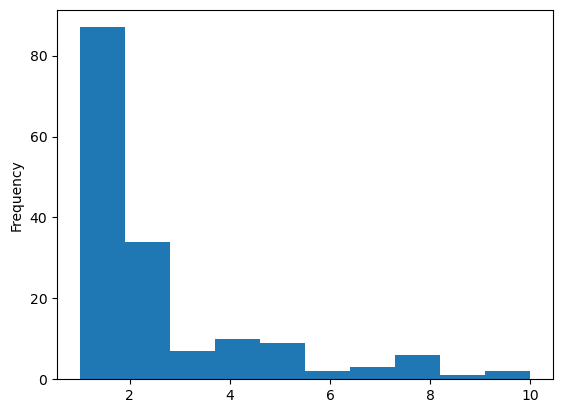

In [38]:
sp[sp<=10].plot(kind = 'hist')

In [39]:
sp[sp<=10].value_counts()

1     87
2     34
4     10
5      9
3      7
8      6
7      3
10     2
6      2
9      1
Name: START, dtype: int64

# Places with highest stop_point

In [40]:
st_p = df.STOP.value_counts()

In [41]:
st_p

Cary                 203
Unknown Location     149
Morrisville           84
Whitebridge           65
Islamabad             58
                    ... 
Daytona Beach          1
Sand Lake Commons      1
Sky Lake               1
Vista East             1
Ilukwatta              1
Name: STOP, Length: 188, dtype: int64

## Most Miles

In [42]:
miles = df.MILES.value_counts()

In [43]:
miles.info()

<class 'pandas.core.series.Series'>
Float64Index: 256 entries, 9.9 to 48.2
Series name: MILES
Non-Null Count  Dtype
--------------  -----
256 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


In [44]:
miles.describe()

count    256.000000
mean       4.511719
std        4.830445
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       28.000000
Name: MILES, dtype: float64

In [45]:
print(miles[miles>10])

9.9     28
3.1     26
2.1     19
10.4    19
3.0     19
2.5     19
1.7     18
1.8     18
2.2     18
2.8     16
1.9     16
2.0     16
3.3     16
6.1     15
3.8     15
5.5     14
1.4     14
1.6     13
7.9     13
2.7     12
2.3     12
6.2     12
5.7     12
2.9     12
1.5     12
6.0     11
4.9     11
7.7     11
5.1     11
1.0     11
Name: MILES, dtype: int64


<Axes: >

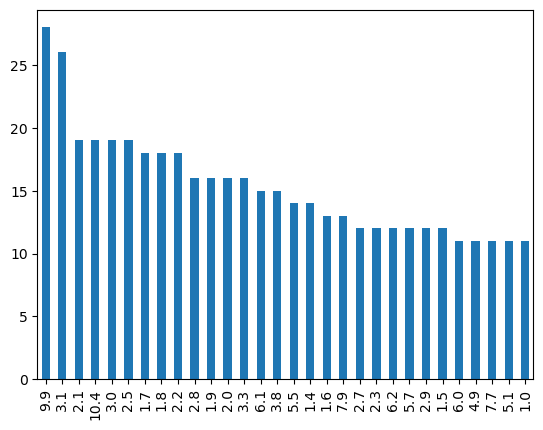

In [46]:
miles[miles>10].plot(kind = 'bar')

In [47]:
df.PURPOSE.value_counts()

Meeting            308
Meal/Entertain     245
Temporary Site     196
Errand/Supplies    173
Customer Visit     155
Airport/Travel      54
Between Offices     18
Moving               4
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [48]:
plt.figure(figsize = (15,7))

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Meeting'),
  Text(1, 0, 'Meal/Entertain'),
  Text(2, 0, 'Temporary Site'),
  Text(3, 0, 'Errand/Supplies'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Airport/Travel'),
  Text(6, 0, 'Between Offices'),
  Text(7, 0, 'Moving'),
  Text(8, 0, 'Charity ($)'),
  Text(9, 0, 'Commute')])

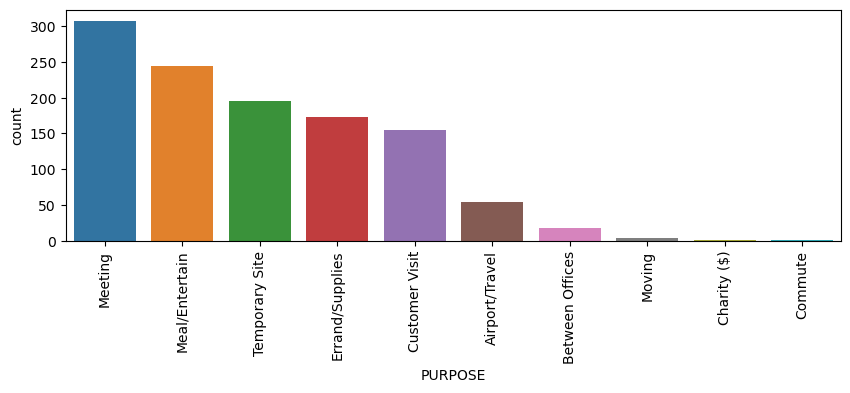

In [49]:
df["PURPOSE"] = pd.Series(df["PURPOSE"])

plt.figure(figsize=(10, 3))
sns.countplot(data=df, x="PURPOSE", order=df["PURPOSE"].value_counts().index)
plt.xticks(rotation = 90)

In [50]:
df.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [51]:
df['START_DATE']

0      2016-01-01 21:11:00
1      2016-01-02 01:25:00
2      2016-01-02 20:25:00
3      2016-01-05 17:31:00
4      2016-01-06 14:42:00
               ...        
1150   2016-12-31 01:07:00
1151   2016-12-31 13:24:00
1152   2016-12-31 15:03:00
1153   2016-12-31 21:32:00
1154   2016-12-31 22:08:00
Name: START_DATE, Length: 1155, dtype: datetime64[ns]

In [52]:
df['END_DATE']

0      2016-01-01 21:17:00
1      2016-01-02 01:37:00
2      2016-01-02 20:38:00
3      2016-01-05 17:45:00
4      2016-01-06 15:49:00
               ...        
1150   2016-12-31 01:14:00
1151   2016-12-31 13:42:00
1152   2016-12-31 15:38:00
1153   2016-12-31 21:50:00
1154   2016-12-31 23:51:00
Name: END_DATE, Length: 1155, dtype: datetime64[ns]

In [53]:
df["MINUTES"] = df.END_DATE - df.START_DATE

In [54]:
df.head(25)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,0 days 00:04:00
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,0 days 00:05:00
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,0 days 00:06:00
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,0 days 00:20:00
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,0 days 00:27:00


In [55]:
df.MINUTES.describe()

count                         1155
mean     0 days 00:23:14.597402597
std      0 days 00:27:19.096606181
min                0 days 00:00:00
25%                0 days 00:10:00
50%                0 days 00:16:00
75%                0 days 00:27:30
max                0 days 05:36:00
Name: MINUTES, dtype: object

In [56]:
df.MINUTES.dtype

dtype('<m8[ns]')

In [57]:
# travel time
df[df["MINUTES"] == df["MINUTES"].max()]

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES
776,2016-09-27 21:01:00,2016-09-28 02:37:00,Business,Unknown Location,Unknown Location,195.6,Temporary Site,0 days 05:36:00


In [58]:
plt.figure(figsize = (10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

<Axes: >

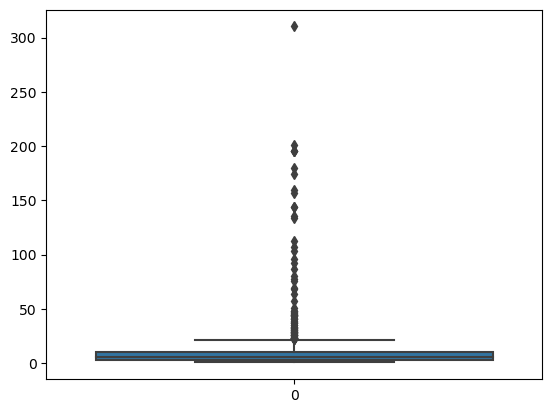

In [59]:
sns.boxplot(df.MILES)


## Q) what is average trip duration(in minutes) for each category?

In [60]:
df.MINUTES[df.CATEGORY.value_counts()].describe()

count                            2
mean               0 days 00:29:00
std      0 days 00:07:04.264068711
min                0 days 00:24:00
25%                0 days 00:26:30
50%                0 days 00:29:00
75%                0 days 00:31:30
max                0 days 00:34:00
Name: MINUTES, dtype: object

In [61]:
avg_duration_by_category = df.groupby('CATEGORY')['MINUTES'].mean()

In [62]:
avg_duration_by_category

CATEGORY
Business   0 days 00:23:26.549165120
Personal   0 days 00:20:27.272727272
Name: MINUTES, dtype: timedelta64[ns]

## Q)  Total mileage distance driven by each purpose of trip

In [63]:
df.groupby('PURPOSE').sum()

,MILES
PURPOSE,
Airport/Travel,807.5
Between Offices,197.0
Charity ($),15.1
Commute,180.2
Customer Visit,2490.2
Errand/Supplies,1025.7
Meal/Entertain,1414.6
Meeting,3897.0
Moving,18.2


## Q) which is the busiest day of the week?

In [64]:
import datetime as dt

In [65]:
busiest_day = df['START_DATE'].dt.day_name().value_counts().idxmax()

In [66]:
busiest_day

'Friday'

In [67]:
friday_df = df[df["START_DATE"].dt.day_name() == 'Friday']
friday_df['PURPOSE'].value_counts()
# friday_df

Meeting            71
Temporary Site     41
Meal/Entertain     31
Errand/Supplies    29
Customer Visit     23
Airport/Travel     10
Between Offices     1
Name: PURPOSE, dtype: int64

In [68]:
df["HOUR"] = df["START_DATE"].dt.hour

In [69]:
purpose_by_hour = df.groupby(['HOUR','PURPOSE']).size().unstack().fillna(0).idxmax()

In [70]:
purpose_by_hour

PURPOSE
Airport/Travel     15
Between Offices    14
Charity ($)        11
Commute            12
Customer Visit     18
Errand/Supplies    17
Meal/Entertain     18
Meeting            13
Moving             10
Temporary Site     10
dtype: int64

## Top locations for meals/entertainment purposes during business trips

In [71]:
meal_ent = df[(df["CATEGORY"] == "BUSINESS") & (df["PURPOSE"] =="Meal/Entertain")]

In [72]:
meal_ent.value_counts().idxmax

<bound method Series.idxmax of Series([], dtype: int64)>

In [73]:
stops = df[(df["CATEGORY"] == "Business") & (df["PURPOSE"] == "Meal/Entertain")]
stops["STOP"].value_counts().idxmax()

'Cary'

In [74]:
df["CATEGORY"] == "BUSINESS"

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Name: CATEGORY, Length: 1155, dtype: bool

In [77]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1150    False
1151    False
1152    False
1153    False
1154    False
Length: 1155, dtype: bool

In [78]:
df.drop_duplicates()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,HOUR
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,21
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,0 days 00:12:00,1
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,20
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,14
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00,1
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,13
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,15
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,21


In [80]:
df['CATEGORY'].unique()

array(['Business', 'Personal'], dtype=object)

In [81]:
df['MILES'].unique()

array([  5.1,   5. ,   4.8,   4.7,  63.7,   4.3,   7.1,   0.8,   8.3,
        16.5,  10.8,   7.5,   6.2,   6.4,   1.6,   1.7,   1.9,   4. ,
         1.8,   2.4,   2. ,  15.1,  11.2,  11.8,  21.9,   3.9,   8. ,
        10.4,   7.2,   7.6,  17.1,  40.2,   1. ,   2.3,   1.4,   0.5,
        18.7,   3.4,   2.7,  12.9,  19. ,  14.7,  15.7,   4.6,   5.2,
        10.1,   5.8,   5.5,   5.7,  19.4,  23.3,   6. ,   9.7,   1.1,
         9. ,   7.7,  11.4,   3.2,   5.6,   6.1,   5.3,   3. ,   1.5,
        17.3,  13.5,   8.5,   2.6,  17. ,  18. ,   8.4,  11.5,   8.9,
         8.1,  13. ,  13.9,  43.7,  14.1,   4.5,   3.6,  21.4,  23.5,
        12.7,  10. ,  18.3,   7.3,   3.5,   4.2,  13.6,   2.5,  14.4,
        18.4,  23.1,  14.5,   8.8,  22.7,   2.2,  20. ,   3.1,   6.3,
        10.6,   9.9,   6.8,   2.1,   3.8,   6.6,  10.9,   4.9,   6.5,
         7.8,   2.8,  12.4,   5.9,   9.4,  11.9,  12.8,   1.2,  10.5,
        12.5, 136. ,  30.2,  15.5,  12.6,  13.2,   9.2,  12. ,  35.1,
        36.5,  57. ,

In [83]:
df['START'].notnull().sum()

1155

In [84]:
subset = df.loc[df['PURPOSE'] == "Meeting"]

In [85]:
subset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,HOUR
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,0 days 00:05:00,17
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,0 days 00:06:00,13
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,0 days 00:20:00,8
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting,0 days 00:43:00,15
...,...,...,...,...,...,...,...,...,...
1143,2016-12-29 20:53:00,2016-12-29 21:42:00,Business,Kar?chi,Unknown Location,6.4,Meeting,0 days 00:49:00,20
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting,0 days 00:33:00,23
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,0 days 00:23:00,16
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00,1


In [108]:
subset_top5 = df.loc[df['PURPOSE'] == "Meeting"]

In [109]:
subset_top5

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,MINUTES,HOUR
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,17
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,0 days 00:05:00,17
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,0 days 00:06:00,13
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,0 days 00:20:00,8
10,2016-01-10 15:08:00,2016-01-10 15:51:00,Business,New York,Queens,10.8,Meeting,0 days 00:43:00,15
...,...,...,...,...,...,...,...,...,...
1143,2016-12-29 20:53:00,2016-12-29 21:42:00,Business,Kar?chi,Unknown Location,6.4,Meeting,0 days 00:49:00,20
1144,2016-12-29 23:14:00,2016-12-29 23:47:00,Business,Unknown Location,Kar?chi,12.9,Meeting,0 days 00:33:00,23
1148,2016-12-30 16:45:00,2016-12-30 17:08:00,Business,Kar?chi,Kar?chi,4.6,Meeting,0 days 00:23:00,16
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00,1


In [88]:
subset_top3 = df.iloc[0:3, 0:4]

In [89]:
subset_top3

,START_DATE,END_DATE,CATEGORY,START
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce


In [100]:
subset_1to3 = df.loc[1:2, ['CATEGORY','MILES']]

In [101]:
subset_1to3

,CATEGORY,MILES
1,Business,5.0
2,Business,4.8


In [97]:
subnet_1to3 =df.iloc[1:3,[2,5]]
subnet_1to3

,CATEGORY,MILES
1,Business,5.0
2,Business,4.8
